In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from IPython.display import Image 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(
    3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(
    filters=128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [14]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
import os
os.getcwd()

'D:\\abhi_deeplearning_projects\\computervision'

In [44]:
%%time
training='D:\\2021_tensorflow\\cats_n_dogs\\train'
validation='D:\\2021_tensorflow\\cats_n_dogs\\validation'
epochs=20

Wall time: 0 ns


In [45]:
%%time
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        samplewise_center=True,
        horizontal_flip=True,
        validation_split=0.3,
        rescale=1.0/255
    )

datagen_flow_object = datagen.flow_from_directory(
    training,
    target_size=(150, 150),
    batch_size=64
)

r = model.fit_generator(
    datagen_flow_object, epochs=epochs,
    validation_data=datagen.flow_from_directory(validation,
                                                target_size=(150, 150),
                                                batch_size=64)
)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


C:\Users\AbhijitShingote\.conda\envs\tf2.6_092021\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
32/32 [==============================] - 43s 1s/step - loss: 0.7175 - accuracy: 0.5435 - val_loss: 0.6653 - val_accuracy: 0.5825
Epoch 2/20
32/32 [==============================] - 3s 107ms/step - loss: 0.6504 - accuracy: 0.6195 - val_loss: 0.6201 - val_accuracy: 0.6550
Epoch 3/20
32/32 [==============================] - 3s 106ms/step - loss: 0.6200 - accuracy: 0.6480 - val_loss: 0.5795 - val_accuracy: 0.6725
Epoch 4/20
32/32 [==============================] - 3s 107ms/step - loss: 0.5799 - accuracy: 0.6860 - val_loss: 0.5522 - val_accuracy: 0.7100
Epoch 5/20
32/32 [==============================] - 4s 109ms/step - loss: 0.5452 - accuracy: 0.7280 - val_loss: 0.5548 - val_accuracy: 0.6900
Epoch 6/20
32/32 [==============================] - 4s 109ms/step - loss: 0.5025 - accuracy: 0.7535 - val_loss: 0.5277 - val_accuracy: 0.7225
Epoch 7/20
32/32 [==============================] - 4s 109ms/step - loss: 0.4897 - accuracy: 0.7575 - val_loss: 0.5200 - val_accuracy: 0.7225
Epoch 8/

In [46]:
model.evaluate(datagen.flow_from_directory(validation,target_size=(150,150),batch_size=64))

Found 400 images belonging to 2 classes.
7/7 [==============================] - 1s 87ms/step - loss: 1.0466 - accuracy: 0.7250


[1.0466395616531372, 0.7250000238418579]

In [ ]:
plt.plot(r.history['loss'],label='training_loss')
plt.plot(r.history['val_loss'],label='validation_loss')

In [ ]:
datagen_flow_object.class_indices
class_dict={value:key for key,value in datagen_flow_object.class_indices.items()}

In [51]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img_path = 'cats_n_dogs/validation/dog/10068.jpg'

def check_pred(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    preds = model.predict(x)

    class_dict={value:key for key,value in datagen_flow_object.class_indices.items()}
    print('Predicted:', class_dict[np.argmax(preds)])

Predicted: cat


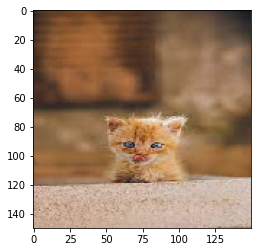

In [52]:
check_pred('testimages/Unknown')

Predicted: dog


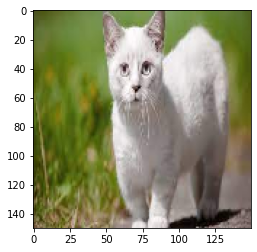

In [53]:
check_pred('testimages/Unknown-2')

Predicted: cat


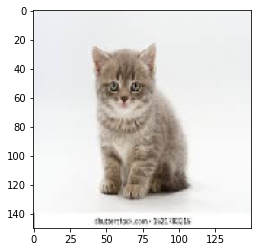

In [54]:
check_pred('testimages/Unknown-3')

Predicted: dog


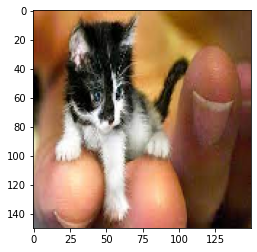

In [55]:
check_pred('testimages/Unknown-4')

Predicted: dog


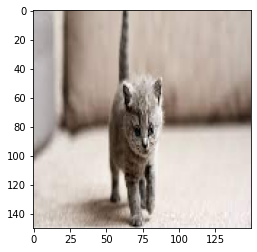

In [56]:
check_pred('testimages/Unknown-5')

Predicted: cat


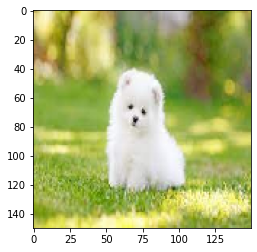

In [57]:
check_pred('testimages/Unknown-6')

Predicted: dog


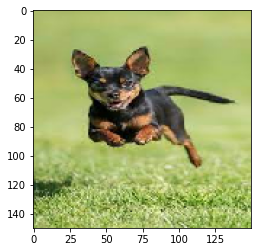

In [58]:
check_pred('testimages/Unknown-7')

Predicted: dog


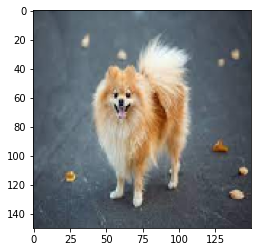

In [59]:
check_pred('testimages/Unknown-8')

Predicted: cat


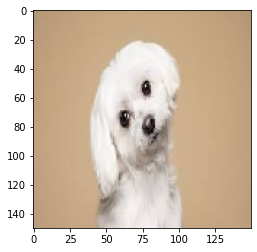

In [60]:
check_pred('testimages/Unknown-9')